首先，我们导入一些必要的库
- KNeighborsClassifier: sklearn库中提供的K近邻算法类
- mnist: Keras库中包含的一个方便我们下载MNIST数据集的类
- pyplot: Python中常用的画图工具matplotlib的画图类
- numpy: Python中用于处理各种数值计算的库

In [1]:
# 如果没有安装 keras 和 tensorflow 库
# 请使用 pip install keras tensorflow 安装
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


使用Keras的mnist的模块加载MNIST数据集。注意原本的输入数据是二维的图像，我们使用reshape函数将二维的图像展开成一维的向量，因为KNeighborsClassifier要求输入数据是向量形式的，并且会使用向量距离计算相似度。

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_train = x_train.shape[0] # 训练数据数量
n_test = x_test.shape[0] # 测试数据数量
print("原输入数据的形状")
print(x_train.shape)
print(x_test.shape)
# 使用reshape方法将图像展开成向量
x_train = x_train.reshape(n_train, -1) 
x_test = x_test.reshape(n_test, -1)
print("reshape后输入数据的数据形状")
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
原输入数据的形状
(60000, 28, 28)
(10000, 28, 28)
reshape后输入数据的数据形状
(60000, 784)
(10000, 784)


可以看到reshape后的训练数据的输入变成了60000个28\*28=784维的向量。
接下来我们调用sklearn中的K近邻算法，K近邻算法会接受一个参数 n_neighbors，也就是查看邻居的个数K。我们将K设为5，即每次寻找最近的5个邻居。

In [3]:
k = 5
knc = KNeighborsClassifier(n_neighbors=k)

接下来我们使用手写数字数据来训练这个K近邻分类器，sklearn库提供了一个非常方便的函数 fit ，它接收两个参数，分别是输入数据和对应的类别。我们把x_train和y_train作为参数传给 fit 函数，即可开始K近邻分类器的训练（训练过程需要花一些时间）。

In [4]:
knc.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

训练完毕！我们使用predict方法对测试集中的10000个数据进行分类，并将分类结果其存到y_predict中（预测也需要花一些时间）。

In [5]:
y_predict = knc.predict(x_test)

将我们的分类结果y_predict与真实的类别y_test进行一一对比，统计分类正确的个数并计算分类准确度。

In [6]:
accuracy = np.sum(y_predict == y_test) / n_test # 正确为1，错误为0，使用sum求和函数统计分类正确的个数
print("准确度为 %f" % accuracy)

准确度为 0.968800


可以看到我们仅仅用了不到10行代码，就得到了一个分类准确度为96.88%的手写数字分类器！怎么样？是不是没有想象中那么复杂？在机器学习领域，有非常多个人和组织，会将已有的算法实现，打包成库，降低其他人使用算法的门槛。找到并使用这些工具，是每个对机器学习感兴趣的人必备的技能。
刚才的10000张图像中，我们分错了322张，让我们看看哪些图像分类错误了。

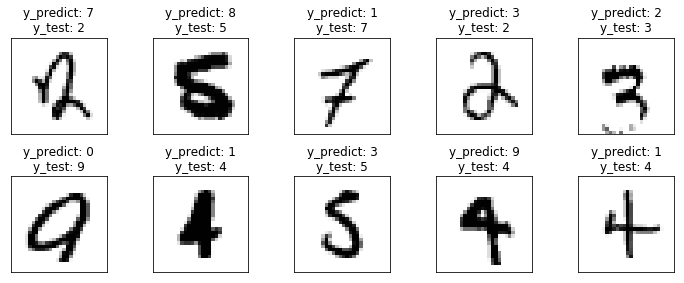

In [7]:
indice = np.random.choice(np.where(y_predict != y_test)[0], size=10) # 随机选择10张分类错误的图像
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()
for i, idx in enumerate(indice):
    axes[i].imshow(x_test[idx].reshape(28, 28), cmap="gray_r")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title("y_predict: %d\ny_test: %d" % (y_predict[idx], y_test[idx]))
plt.tight_layout()
plt.show()

y_predict是K近邻算法的分类结果，y_test是正确分类。可以看到我们分类错误的基本都是一些歪歪扭扭，与正常写法有较大差异的案例。